CS249 -- Spring 2017 -- D.S. Parker &copy; 2017

# Normal Distributions, Covariance, and Correlation

## The Normal (aka Gaussian) Distribution

Normal density:
$$
f(z) ~~=~~ \frac{1}{\sqrt{2\pi}} ~ \exp\left({-{\frac{1}{2}}\,z^2}\right) .
$$

Yes!  It is a density: 
$$
\int_{-\infty}^{\infty} \, \exp(-{\frac{1}{2}}\,t^2) \, dt ~=~ \sqrt{2\pi}.
$$

$$
f(x)_{\mu,\sigma} ~~~=~~~ \frac{1}{\sqrt{2\pi}\,\sigma} ~
\exp\left({ -\frac{1}{2} \, \left(\frac{x - \mu}{\sigma}\right)^2 }\right) .
$$

Normal distribution:
$$
F(x)_{\mu,\sigma} ~~~=~~~ \frac{1}{\sqrt{2\pi}\,\sigma} ~
\int_{-\infty}^{x} ~
\exp\left({-{\frac{1}{2}}\,\left(\frac{t - \mu}{\sigma}\right)^2}\right) ~ dt .
$$
Gauss' error function:
$$
\mbox{erf}(x)
    ~~=~~ \frac{2}{\sqrt{\pi}} ~ \int_{0}^{x} ~ \exp\left({-z^2}\right) ~ dz
$$
so that in particular
$$
\frac{1}{2} ~~ \mbox{erf}( x/\sqrt{2} )
    ~~=~~ F(x)_{0,1} ~-~ F(0)_{0,1}
    ~~=~~ F(x)_{0,1} ~-~ \frac{1}{2} .
$$

In [8]:
? dnorm  # the Normal pdf

In [30]:
options( repr.plot.width=5, repr.plot.height=5 )

## Origins:  Francis Galton's studies of Human Variation

<a href="http://en.wikipedia.org/wiki/Francis_Galton">Francis Galton</a>
studied distributions of measurements among relatives,
nd ultimately developed the <i>bivariate normal distribution</i>, <i>regression</i>, and <i>correlation</i>.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Galton%27s_correlation_diagram_1875.jpg/708px-Galton%27s_correlation_diagram_1875.jpg">Galton's correlation diagram, 1875</img>

In [ ]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1]) 

if (not.installed("psych")) install.packages("psych")  # psych has the Galton dataset
library(psych)

       vars   n  mean   sd median trimmed  mad  min  max range  skew kurtosis
parent    1 928 68.31 1.79   68.5   68.32 1.48 64.0 73.0     9 -0.04     0.05
child     2 928 68.09 2.52   68.2   68.12 2.97 61.7 73.7    12 -0.09    -0.35
         se
parent 0.06
child  0.08


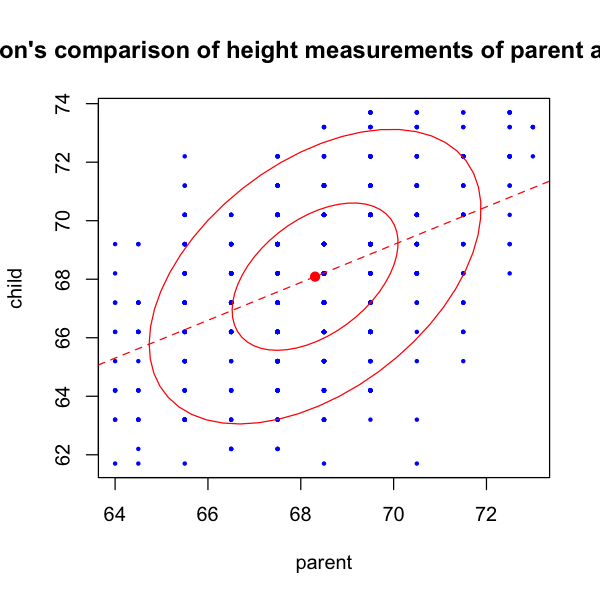

In [31]:
# parent height vs child height:  928 x 2 table
data(galton)

# Galton, F. (1886). "Regression towards mediocrity in hereditary stature".
# The Journal of the Anthropological Institute of Great Britain and Ireland 15: 246-263. 
# doi:10.2307/2841583 -- JSTOR 2841583.

print( describe(galton) )

plot(galton, pch=16, col="blue", main="Galton's comparison of height measurements of parent and child", cex=0.5)

# Regression to the mean:  following an extreme random event, the next random event is likely to be less extreme.

ellipses(galton, add=TRUE, smooth=FALSE, lm=TRUE)  # add a linear model through the data

#  Ellipse dimensions are calculated from the correlation r
#  between the x and y variables and are scaled as sqrt(1+r) and sqrt(1-r).

## A popular example of variation:  the Iris Data

In [32]:
data(iris)

X  =  data.matrix( iris[, 1:4] )  #   first, we study only the first four columns (as a matrix)

head(X)
summary(X)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

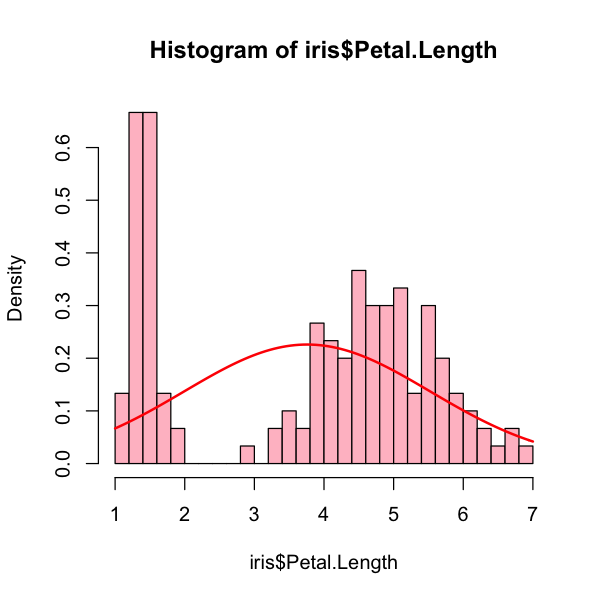

In [33]:
options( repr.plot.width=5, repr.plot.height=5 )

hist( iris$Petal.Length, breaks=25, col="pink", probability = TRUE )

# scale to probability values (to permit adding curves)

curve( dnorm(x, mean=mean(iris$Petal.Length), sd=sd(iris$Petal.Length)), col="red", lwd=2, add=TRUE )


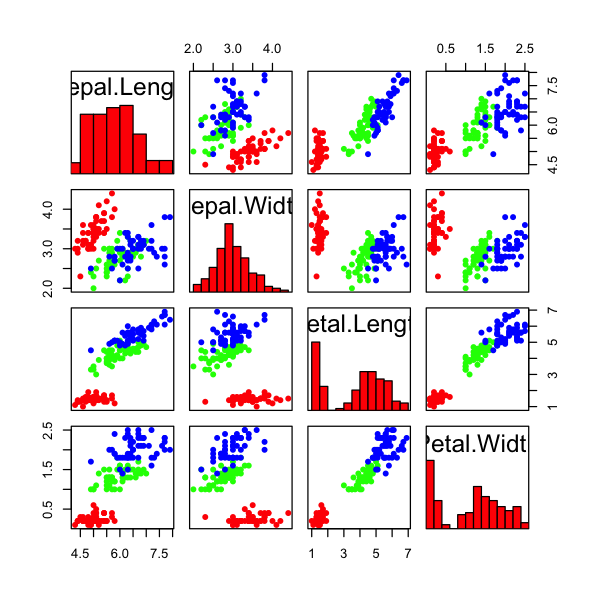

In [34]:
##  Scatterplot
options( repr.plot.width=5, repr.plot.height=5 )

panel.hist = function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, ...)
}

species_number = unclass(iris$Species)
iris_colors = c("red","green","blue")

pairs( X, col=iris_colors[species_number], pch=16, diag.panel = panel.hist )


## Slope values in the Pairs Plot -- and Covariance

Notice that each panel in the pairs plot suggests a "slope" of the (x,y) values.

For Petal.Length vs. Petal.Width, for example, the slope is positive.

We say that <b>Petal.Length and Petal.Width covary</b>.

On the other hand, Sepal.Length and Sepal.Width have negative slope.

We say that <b>Sepal.Length and Sepal.Width covary negatively</b>.

In [35]:
# signs of slopes in the pairs plots = signs of entries in Covariance matrix

print( sign(cov(X)) )

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length            1          -1            1           1
Sepal.Width            -1           1           -1          -1
Petal.Length            1          -1            1           1
Petal.Width             1          -1            1           1


# Covariance:   a fundamental measure of data similarity

In [36]:
cov( X )  #  covariance of the first 4 columns of the iris table

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.6856935,-0.0424340,1.2743154,0.5162707
Sepal.Width,-0.0424340,0.1899794,-0.3296564,-0.1216394
Petal.Length,1.2743154,-0.3296564,3.1162779,1.2956094
Petal.Width,0.5162707,-0.1216394,1.2956094,0.5810063


In [37]:
round(cov( X ), 2)   #  the same table, rounded to 2 digits

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.69,-0.04,1.27,0.52
Sepal.Width,-0.04,0.19,-0.33,-0.12
Petal.Length,1.27,-0.33,3.12,1.30
Petal.Width,0.52,-0.12,1.30,0.58


In [38]:
X_column_means =  apply(X, 2, mean)  #  apply 'mean' along the 2nd dimension (= columns)

n = nrow(X)
p = ncol(X)

X_mu  =  matrix( X_column_means, n, p, byrow=TRUE )
head(X_mu)

5.843333,3.057333,3.758,1.199333
5.843333,3.057333,3.758,1.199333
5.843333,3.057333,3.758,1.199333
5.843333,3.057333,3.758,1.199333
5.843333,3.057333,3.758,1.199333
5.843333,3.057333,3.758,1.199333


In [39]:
X_centered =  X - X_mu

covX =  1/(n-1) * t(X_centered) %*% X_centered

print( round( covX, 2 ) )

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         0.69       -0.04         1.27        0.52
Sepal.Width         -0.04        0.19        -0.33       -0.12
Petal.Length         1.27       -0.33         3.12        1.30
Petal.Width          0.52       -0.12         1.30        0.58


In [40]:
print( round( cov(X), 2) )

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         0.69       -0.04         1.27        0.52
Sepal.Width         -0.04        0.19        -0.33       -0.12
Petal.Length         1.27       -0.33         3.12        1.30
Petal.Width          0.52       -0.12         1.30        0.58


# Correlation:  Covariance normalized to stay within [-1,+1]

In [41]:
X_column_stddevs =  apply(X, 2, sd)    #  apply 'sd' along the 2nd dimension (= columns)

X_sigma =  matrix( X_column_stddevs, n, p, byrow=TRUE )

head(X_sigma)

0.8280661,0.4358663,1.765298,0.7622377
0.8280661,0.4358663,1.765298,0.7622377
0.8280661,0.4358663,1.765298,0.7622377
0.8280661,0.4358663,1.765298,0.7622377
0.8280661,0.4358663,1.765298,0.7622377
0.8280661,0.4358663,1.765298,0.7622377


In [42]:
Z_scores  =  (X - X_mu) /  X_sigma   #  compute the z-scores for the matrix X

#  note:  R's default is element-wise matrix computation

round( head(Z_scores), 2 )

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.90,1.02,-1.34,-1.31
-1.14,-0.13,-1.34,-1.31
-1.38,0.33,-1.39,-1.31
-1.50,0.10,-1.28,-1.31
-1.02,1.25,-1.34,-1.31
-0.54,1.93,-1.17,-1.05


In [43]:
cor( X )  #  correlation of the first 4 columns of the iris table

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [44]:
round(cor( X ), 2)   #  the same table, rounded to 2 digits

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.00,-0.12,0.87,0.82
Sepal.Width,-0.12,1.00,-0.43,-0.37
Petal.Length,0.87,-0.43,1.00,0.96
Petal.Width,0.82,-0.37,0.96,1.00


In [45]:
X_centered =  X - X_mu

corrX =  1/(n-1)  *  t(Z_scores) %*% Z_scores

print( round( corrX, 2 ) )

             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         1.00       -0.12         0.87        0.82
Sepal.Width         -0.12        1.00        -0.43       -0.37
Petal.Length         0.87       -0.43         1.00        0.96
Petal.Width          0.82       -0.37         0.96        1.00


### The correlation matrix is the covariance matrix of Z-scores

###  Correlation is easy to Visualize

Some nice examples of sets of data vectors $x = (x_i)$, $y = (y_i)$
plotted as a set of 2D points $\{ (x_i,y_i) \}$ ---
with the correlation value of x and y displayed above the plot.

(This is closely related to the comments above about covariance and slope values in the pairs plot.)

<img style="width:800px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2000px-Correlation_examples2.svg.png">

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2000px-Correlation_examples2.svg.png">Wikipedia source</a>

## Covariance vs. Correlation Matrices

In [46]:
D = diag( X_column_stddevs )  #  pxp diagonal matrix whose entries are stddevs of X

print(D)

print(round( D %*% cor(X) %*% D, 2 ))

print(round( cov(X), 2 ))


          [,1]      [,2]     [,3]      [,4]
[1,] 0.8280661 0.0000000 0.000000 0.0000000
[2,] 0.0000000 0.4358663 0.000000 0.0000000
[3,] 0.0000000 0.0000000 1.765298 0.0000000
[4,] 0.0000000 0.0000000 0.000000 0.7622377
      [,1]  [,2]  [,3]  [,4]
[1,]  0.69 -0.04  1.27  0.52
[2,] -0.04  0.19 -0.33 -0.12
[3,]  1.27 -0.33  3.12  1.30
[4,]  0.52 -0.12  1.30  0.58
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length         0.69       -0.04         1.27        0.52
Sepal.Width         -0.04        0.19        -0.33       -0.12
Petal.Length         1.27       -0.33         3.12        1.30
Petal.Width          0.52       -0.12         1.30        0.58


# Higher-Dimensional Distributions

## The bivariate (2D) Normal distribution

Random variables, and distributions, can be $n$-dimensional.
Galton's bivariate normal distribution is an important example.

## The Multivariate (nD) Normal Distribution

We can define a $p$-dimensional Gaussian function in the following way.
Let $\boldsymbol{x}$ be a $p$-dimensional value,
$\mu$ be a $p$-dimensional vector of means,
and
$\Sigma$ be a positive definite $p \times p$ covariance matrix.
Then
$$
g({\boldsymbol{x}}, {\boldsymbol{\mu}}, \Sigma) ~~=~~
\frac{1}{{(2\,\pi)}^{p/2}} ~
\frac{1}{\sqrt{\det\,\Sigma}} ~
\exp\left({ \, -\frac{1}{2} \;
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})'}
\, \Sigma^{-1} \,
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})}
 \, }\right) .
$$
Here we require $\Sigma$ to be positive definite so that its determinant is positive and the square root is defined.
If we let $W = \Sigma^{-1}$ be the inverse of the covariance matrix,
we get the commonly-used formula
$$
g({\boldsymbol{x}}, {\boldsymbol{\mu}}, W^{-1}) ~~=~~
\frac{1}{{(2\,\pi)}^{p/2}} ~
\sqrt{{\det\,W}} ~
\exp\left({ \, -\frac{1}{2} \;
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})'}
\, W \,
{\,({\boldsymbol{x}}-{\boldsymbol{\mu}})}
 \, }\right) .
$$
The theory of linear models makes heavy use of higher-dimensional Normal distributions.




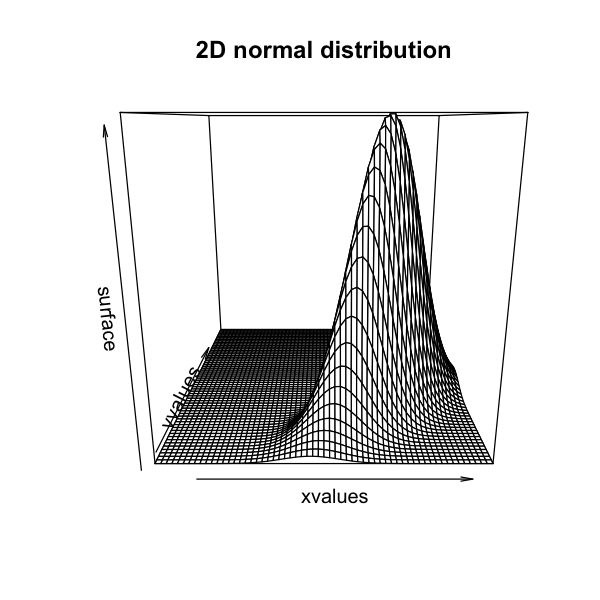

In [47]:
xmeans  = apply(X, 2, mean)
xsds = apply(X, 2, sd)

Sigma = cov(X)  # covariance matrix
detSigma = det(Sigma)

W = solve(Sigma)  #  This is R's way to compute:  inverse(Sigma)

gaussian = function(xvec) {
     1 / sqrt(2*pi)^2 / sqrt(detSigma) *
         exp( -1/2 * ( t(xvec-xmeans) %*% W %*% (xvec-xmeans) )[1,1] )
}

# generate a surface, filled with heights of a 2D Gaussian

nvalues = 61
xvalues = seq(-3,3, length=nvalues) * xsds[1] + xmeans[1]
yvalues = seq(-3,3, length=nvalues) * xsds[2] + xmeans[2]

surface = matrix(0, nvalues, nvalues)
for (i in 1:nvalues) {
   for (j in 1:nvalues) {
      surface[i,j] = gaussian( c(xvalues[i],yvalues[j]) )
   }
}


persp(surface, x=xvalues, y=yvalues, main="2D normal distribution")


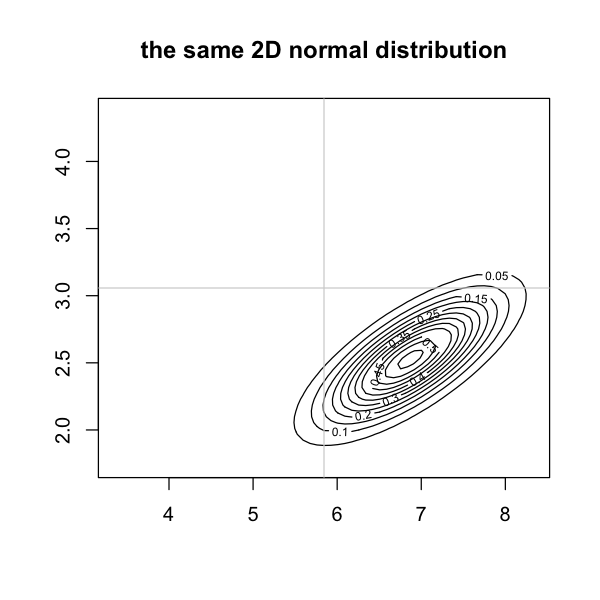

In [48]:
# plot the 2D Gaussian ("bi-variate normal distribution")

contour(surface, x=xvalues, y=yvalues, main="the same 2D normal distribution")

abline(v=mean(xvalues),col="lightgray")
abline(h=mean(yvalues),col="lightgray")

## Set up tools for LDA and QDA modeling

In [27]:
#  LDA and QDA are implemented in the MASS package

if (!(is.element("MASS", installed.packages())))  install.packages("MASS")

require(MASS)

Loading required package: MASS


In [49]:
LDA_model = lda(Species ~ ., data = iris )

projected_LDA = predict(object = LDA_model, newdata = iris)

dataset = data.frame(Species = iris$Species, LDA = projected_LDA$x)


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



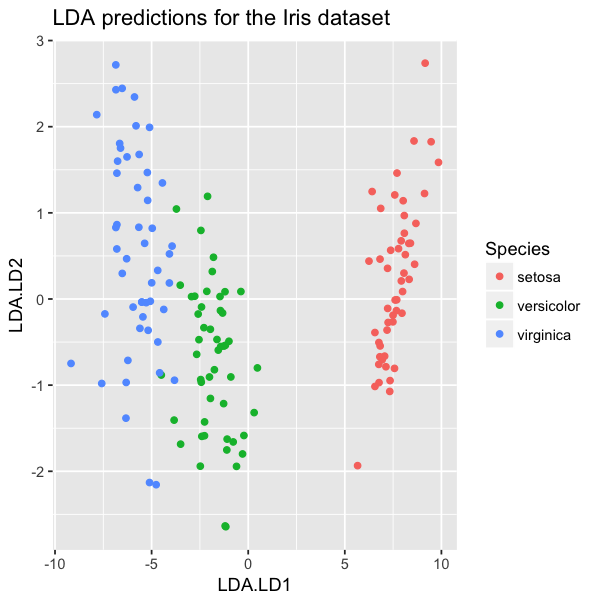

In [50]:
if (!(is.element("ggplot2", installed.packages())))  install.packages("ggplot2")

library(ggplot2)

ggplot(dataset) + geom_point(aes(LDA.LD1, LDA.LD2, color = Species), size = 1.5) + 
    ggtitle("LDA predictions for the Iris dataset")